In [1]:
import jax.numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from jax import vmap, jit
from utils import MidpointNormalize
import seaborn as sns
import jax
from functools import partial

plt.rc('font', size=6)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
plt.rc('axes', labelsize=8)
plt.rc('legend', fontsize=6)
rcParams['font.family'] = "sans-serif"
rcParams['font.sans-serif'] = "Helvetica"

cm = 1 / 2.54


In [2]:
C_vipurpca = np.load('../results/MCcomparison/vipurpcaCov_1000_10.npy')
Vs = np.load('../results/MCcomparison/MCeigs_1000_10.npy')

#C_vipurpca2 = np.load('../results/MCcomparison/vipurpcaCov_999_100.npy')
#Vs2 = np.load('../results/MCcomparison/MCeigs_999_100.npy')
#C_vipurpca3 = np.load('../results/MCcomparison/vipurpcaCov4.npy')
#Vs3 = np.load('../results/MCcomparison/MCeigs4.npy')


In [13]:
print(C_vipurpca.shape)

(10000, 10000)


<AxesSubplot:>

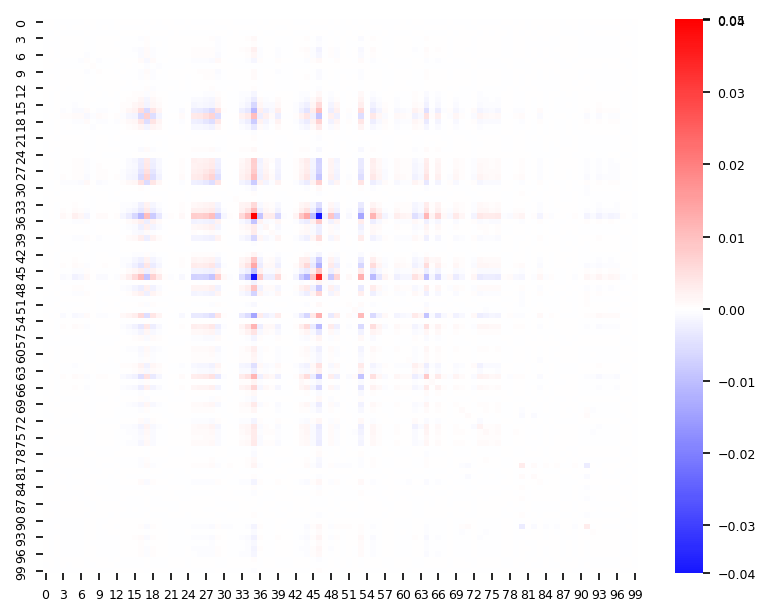

In [3]:
#C_vipurpca = C_vipurpca[0:200, 0:200]
f = plt.figure()
sns.heatmap(C_vipurpca, cmap='bwr', 
            norm=MidpointNormalize(midpoint=0, vmin=np.min(C_vipurpca), vmax=np.max(C_vipurpca)))

<AxesSubplot:>

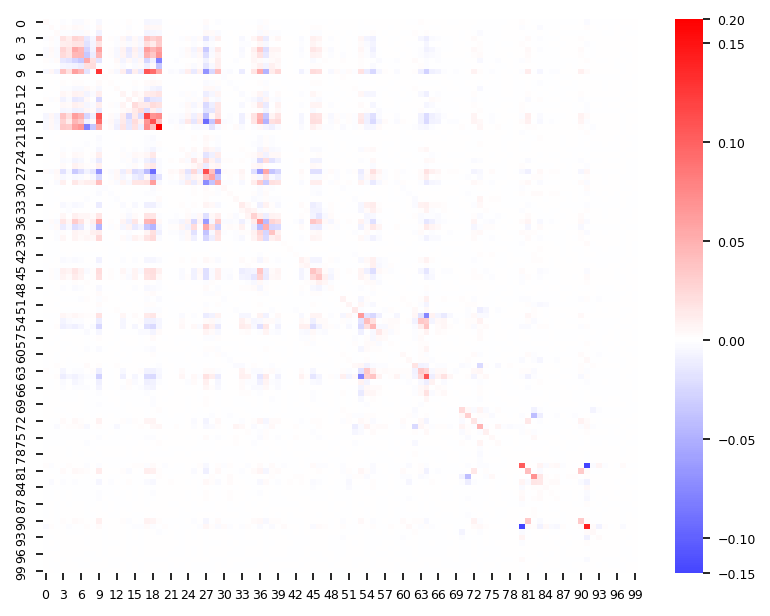

In [4]:
C_mc = np.cov(np.transpose(Vs[0:1000]))
f = plt.figure()
sns.heatmap(C_mc, cmap='bwr', 
            norm=MidpointNormalize(midpoint=0, vmin=np.min(C_mc), vmax=np.max(C_mc)))

In [ ]:
_, E, _ = np.linalg.svd(C_vipurpca)

In [ ]:
_, E_mc, _ = np.linalg.svd(np.cov(np.transpose(Vs[0:1000])))

In [ ]:
f = plt.figure()
plt.plot(E)
plt.plot(E_mc)

In [3]:
def compute_error(C_vipurpca, Vs, ind):
    where = np.zeros_like(Vs)
    where = where.at[:, :ind].set(1)
    Vs = Vs - np.mean(Vs, axis=0, where=where)
    Vs = Vs.at[:, ind:].set(0)
    C_mc = 1/(ind-1)*(np.dot(Vs, np.transpose(Vs)))
    error = np.sqrt(np.sum((C_mc - C_vipurpca)**2)/(C_mc.shape[0]*C_mc.shape[1]))
    return error

r = range(2, 1000, 20)
errors = [compute_error(C_vipurpca, np.transpose(Vs), i) for i in r]

In [9]:
def other_fun(x):
    return x + 1

@partial(jax.jit, static_argnums=(1,))
def fun(x, index):
    update = other_fun(x[:index])
    return jax.lax.dynamic_update_slice(x, update, (0,))

x = np.arange(5)
print(fun(x, 3))  # prints [1 2 3 3 4]

[1 2 3 3 4]


In [11]:
print(Vs.shape)

(1000, 10000)


In [ ]:
def compute_error_slice(C, Vs_slice):
    print('Hi')
    C_mc = np.cov(np.transpose(Vs_slice))
    error = np.sqrt(np.sum((C_mc - C_vipurpca)**2)/(C_mc.shape[0]*C_mc.shape[1]))
    print(error)
    return error

def fun(C, Vs, index):
    error = compute_error_slice(C, Vs[:index])
    return error

error = [fun(C_vipurpca, Vs, i) for i in range(2, 1000, 20)]

Hi
0.014092317
Hi
0.0040335767
Hi
0.0041881977
Hi
0.0044490453
Hi
0.00450596
Hi
0.0045417272
Hi
0.004518369
Hi
0.0044655544
Hi
0.004485679
Hi
0.0044111204
Hi
0.0043749595
Hi
0.00437921
Hi
0.0043388824
Hi
0.004352509
Hi
0.0043680375
Hi
0.0043229987
Hi
0.004359028
Hi
0.0043821796
Hi
0.004392911
Hi
0.0043673725
Hi
0.0043415125
Hi
0.004331943
Hi
0.004327451
Hi
0.004331046
Hi
0.0043654935
Hi
0.0043801568
Hi
0.0043780454
Hi


In [ ]:
#@partial(jit, static_argnums=(1,))
#def compute_error(x, ind):
#    C_vipurpca, Vs = x
#    return compute_error_slice(C_vipurpca, np.transpose(Vs[:ind]))
    

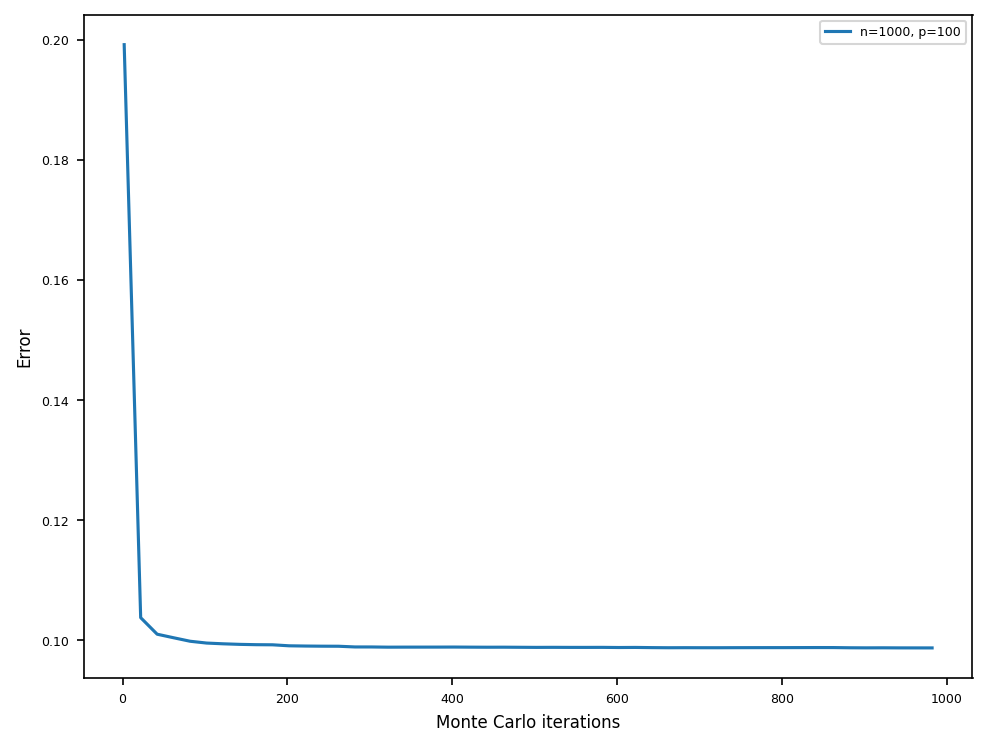

In [7]:
f = plt.figure(tight_layout = {'pad': 0.1})
plt.ylabel('Error')
plt.xlabel('Monte Carlo iterations')
plt.plot([i for i in r], errors, label='n=1000, p=100')
#plt.plot(np.arange(2, 200, 20), errors2, label='n=1000, p=100')
#plt.plot(np.arange(2, 10), errors3, label='huge p')
#plt.xlim(200,1000)
#plt.ylim(0, 0.001)
plt.legend()
#plt.legend(title='# of dimensions', fontsize=6)
#plt.yscale('log', base=10)
#plt.xscale('log', base=10)
plt.tight_layout()
plt.savefig('../results/MCcomparison/errors.pdf')

In [ ]:
x = np.array([[1, 2, 3],[4, 5, 6]])
x = x-np.mean(x, axis=0)

In [ ]:
x